In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pylab

# Resonating frequency

Here is the plot of the amplitude peak we observed.
After several tries , we plotted an approximation of this peak with a Gaussian :
$$ g(x) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2} $$
with $\mu = 40322.5$ and $\sigma = 550$.

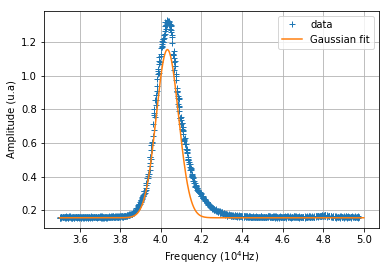

In [2]:
plt.xlabel('Frequency ($10^{4}$Hz)')
plt.ylabel('Amplitude (u.a)')

data = pd.read_csv('Plot1largepeak.csv', sep= '\t')
data.frequency = (data.frequency*2500 + 35000)
pylab.plot(data.frequency, data.amplitude, '+', label= 'data')

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

mu = 40322.5
sig = 550
x = np.linspace(35000, 50000,1000)
pylab.plot(x, gaussian(x, mu, sig)+0.155, label = 'Gaussian fit')
pylab.legend(loc='upper right')
pylab.xticks([36000,38000,40000,42000,44000,46000,48000,50000], ['3.6','3.8','4.0','4.2','4.4','4.6','4.8','5.0'])
pylab.grid()


# Speed
First, we plot the approximations of the wave lenght in function of the number of periods away from the begining point of measurement 

[1.24000248000496,
 2.48000496000992,
 3.72000744001488,
 4.96000992001984,
 6.2000124000248,
 7.44001488002976]

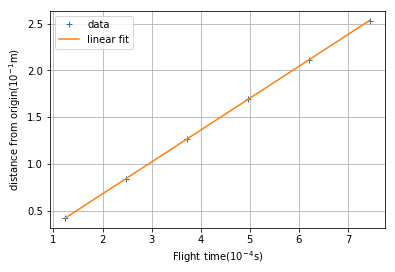

In [3]:
distance = [0.042, 0.084, 0.127, 0.169, 0.2115, 0.253]
numberperiod = [5, 10, 15, 20, 25, 30]
time = []
for i in range(0,6):
    time.append(numberperiod[i]*(1/40322.5)*10000)
    distance[i] *=10
    
"""we have a frequency that we kept from the last experiment"""
    
coeffs = np.polyfit(time, distance,1)
fit = np.polyval(coeffs, time)


label = "linear fit :" + str(coeffs[0]) +"x +" + str(coeffs[1])
pylab.xlabel('Flight time($10^{-4}$s)')
pylab.ylabel('distance from origin($10^{-1}$m)')
pylab.plot(time, distance, '+', label = 'data')
pylab.plot(time, fit, '-', label = 'linear fit')
pylab.legend(loc='upper left')
pylab.grid()
label
time

Here is the calculation of $\lambda$

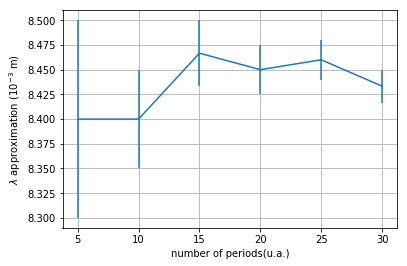

In [4]:
lambda_approx = []
error = []
for i in range(0,6):
    distance[i]/= 10
    lambda_approx.append(distance[i]/numberperiod[i] * 1000)
    error.append(0.5/numberperiod[i])

pylab.xlabel('number of periods(u.a.)')
pylab.ylabel('$\lambda$ approximation ($10^{-3}$ m)')
pylab.errorbar(numberperiod, lambda_approx,error)
pylab.grid()

'linear fit :0.3378x -0.018899999999999993'

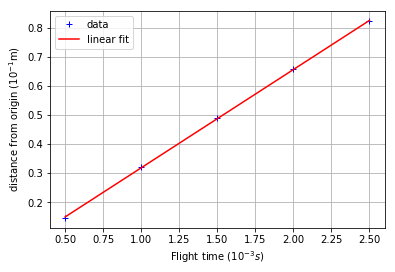

In [5]:
distance2 = [0.146, 0.322, 0.49, 0.659, 0.822]
temps_vol = [0.5, 1, 1.5, 2, 2.5]

for i in range (0,6):
    distance[i] *= 10

coeffs = np.polyfit(temps_vol, distance2,1)
fit = np.polyval(coeffs, temps_vol)
label = "linear fit :" + str(coeffs[0]) +"x " + str(coeffs[1])

pylab.plot(temps_vol, distance2, 'b+',label = 'data')
pylab.plot(temps_vol, fit,'r-', label = 'linear fit')
pylab.legend(loc='upper left')

plt.xlabel( 'Flight time ($10^{-3}s)$')
plt.ylabel( 'distance from origin ($10^{-1}$m)')
pylab.grid()
label

# Here is a theoretical model of wave superposition 
There are 6 toggles to change: 
    - both signals amplitudes
    - both signals dephasing
    - both signal frequency

<IPython.core.display.Javascript object>


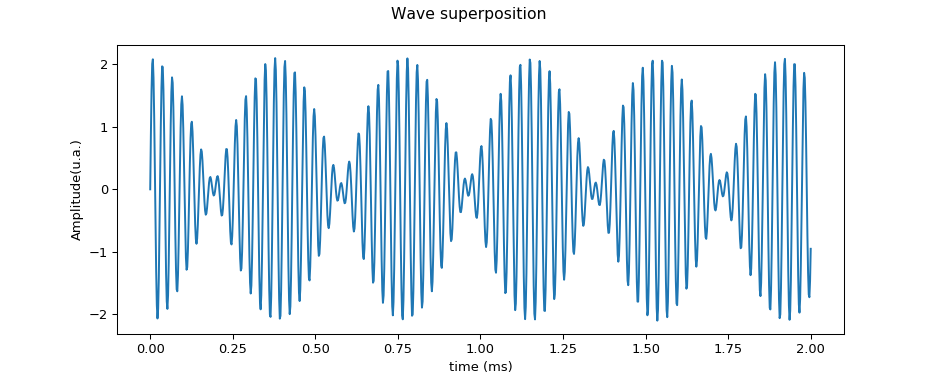

FloatSlider(value=1.0, description='Amplitude 1', max=6.0)

FloatSlider(value=1.0, description='Phase 1', max=6.283185307179586)

FloatSlider(value=35000.0, description='Frequency 1', max=50000.0, min=35000.0)

FloatSlider(value=1.0, description='Amplitude 2', max=10.0)

FloatSlider(value=1.0, description='Phase 2', max=6.283185307179586)

FloatSlider(value=35000.0, description='Frequency 2', max=50000.0, min=35000.0)

In [6]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib nbagg

x1 = np.linspace(0,2,1000)
fig, ax = plt.subplots(1,figsize=(10,4))
plt.suptitle('Wave superposition')

def update_plot(amp1, phase1, freq1, amp2, phase2, freq2):
    """
    this function is linked to the sliders and replots the superposition
    when the sliders are changed
    """
    ax.clear()
    y=amp1*np.sin(2*np.pi*(freq1*x1 + phase1)) + amp2*np.sin(2*np.pi*(freq2*x1 + phase2))
    ax.plot(x1,y)
    plt.xlabel('time (ms)')
    plt.ylabel('Amplitude(u.a.)')
    plt.show()
    
amp1 = widgets.FloatSlider(min=0, max=6, value=1, description='Amplitude 1')
phase1 = widgets.FloatSlider(min=0, max=2*np.pi, value=1, description='Phase 1')
freq1 = widgets.FloatSlider(min=35000, max=50000, value=1, description='Frequency 1')

amp2 = widgets.FloatSlider(min=0, max=10, value=1, description='Amplitude 2')
phase2 = widgets.FloatSlider(min=0, max=2*np.pi, value=1, description='Phase 2')
freq2 = widgets.FloatSlider(min=35000, max=50000, value=1, description='Frequency 2')

widgets.interactive(update_plot, amp1= amp1, amp2 = amp2, phase1=phase1, phase2 = phase2, freq1 = freq1, freq2 = freq2)
display(amp1, phase1, freq1, amp2,phase2, freq2)